In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('baseball_case_study.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Summary Statistics

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations :-
    
1. The mean is more than median for AB, H, HR, CG, SV and E columns.

# Exploring Target Variable

In [8]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

In [9]:
# As we have continuos values in W column, so, this is a regression problem.

# Data Visualizations

To check missing values

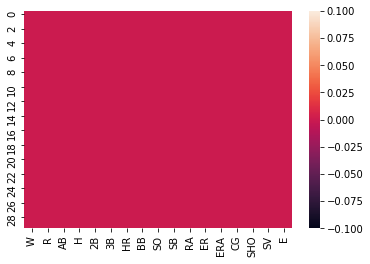

In [10]:
sns.heatmap(df.isnull())

Observations:-
    
1. There is no missing values in the dataset.

# Univariate Analysis

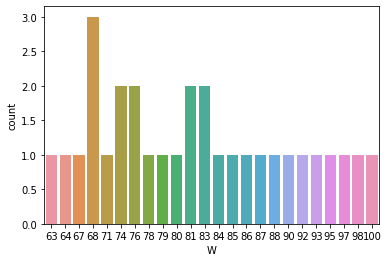

In [11]:
sns.countplot(df['W'])

Observations :-
    
1. Team has got 68 number of wins thrice.
2. Minimum number of wins is 63.
3. Maximum number of wins is 100.
4. Team has got 74, 76, 81 and 83 number of wins twice.
5. Rest of the number of wins has got by team only once.

# Bivariate Analysis

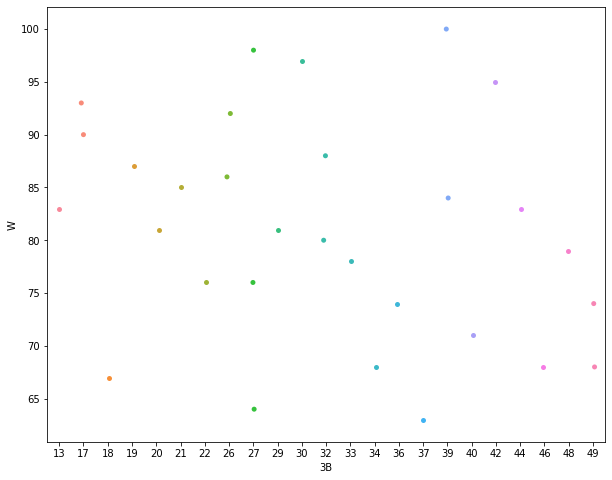

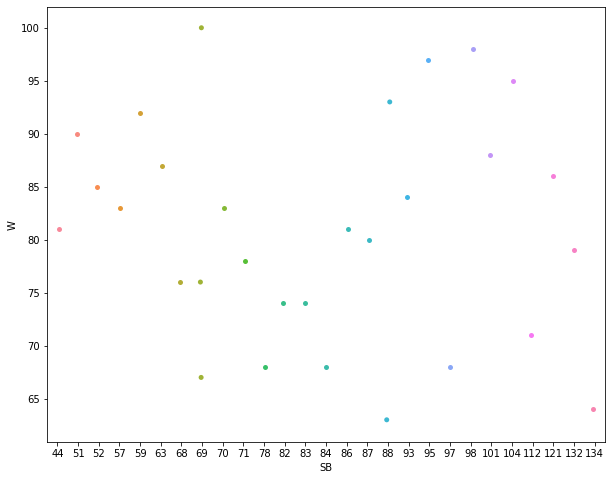

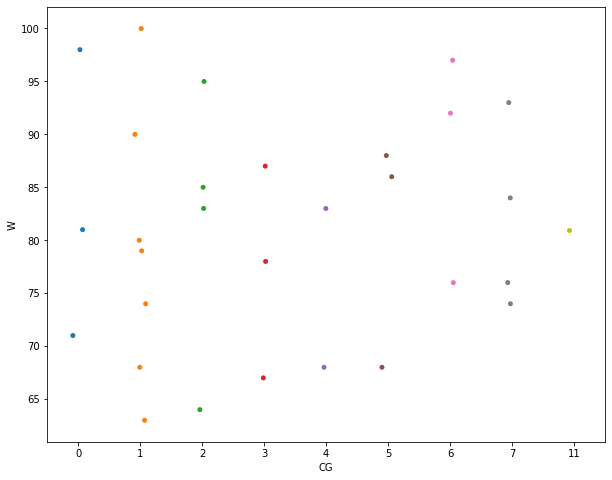

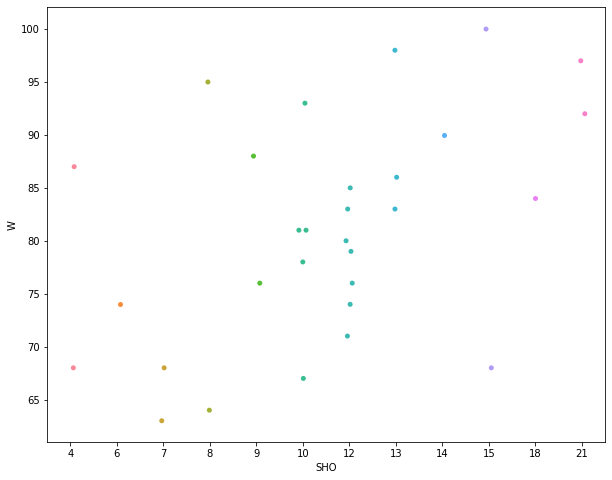

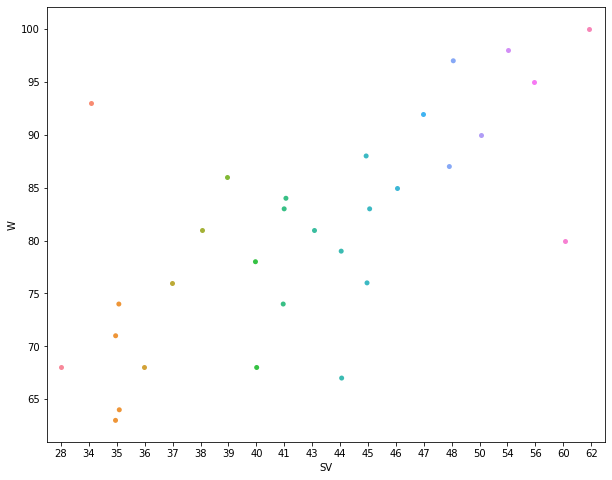

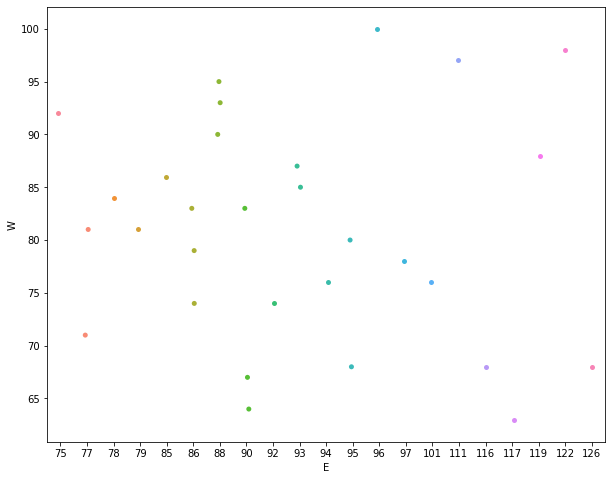

In [12]:

list=[  '3B',    'SB',  
       'CG', 'SHO', 'SV', 'E']
for value in list:
    plt.figure(figsize=(10,8))
    sns.stripplot(x=value,y='W',data=df)
    plt.show()



Observations :-

1. 100 number of wins is gained using 39 triples by team.
2. 100 number of wins is gained using 69 stolen bases by team.
3. 100 number of wins is gained using 1 common game by team.
4. 100 number of wins is gained using 15 shutouts by team.
5. 100 number of wins is gained using 62 saves by team.
6. 100 number of wins is gained using 96 errors by team.
7. 63 number of wins is gained using 37 triples by team.
8. 63 number of wins is gained using 88 stolen bases by team.
9. 63 number of wins is gained using 1 common game by team.
10. 63 number of wins is gained using 7 shutouts by team.
11. 63 number of wins is gained using 35 saves by team.
12. 63 number of wins is gained using 117 errors by team.

# Univariate Analysis

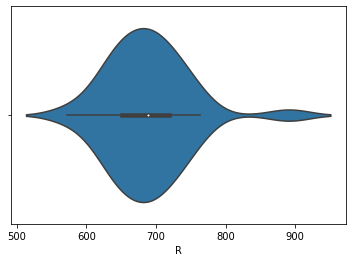

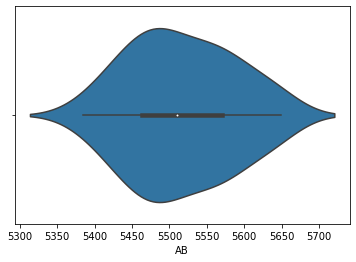

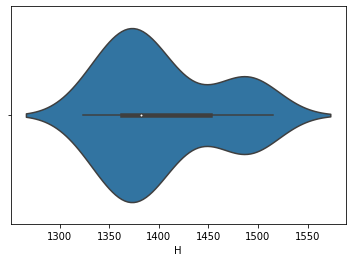

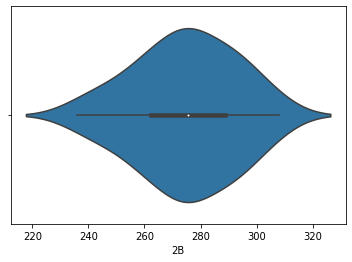

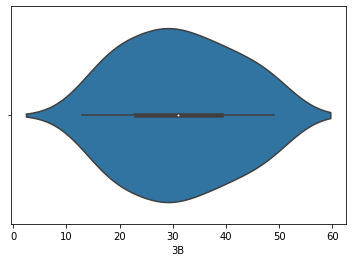

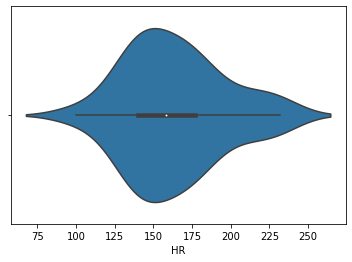

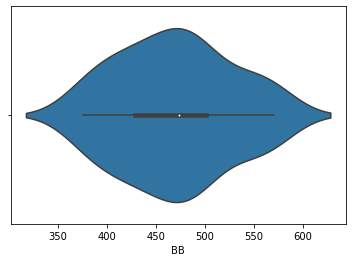

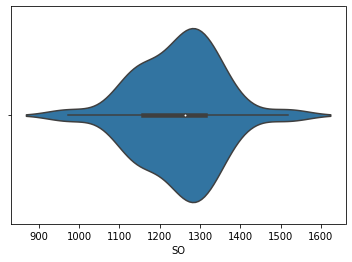

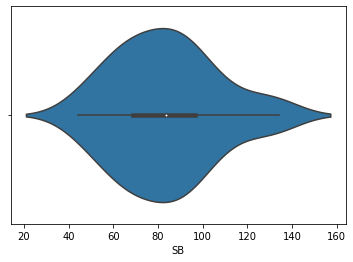

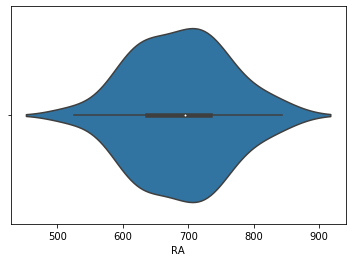

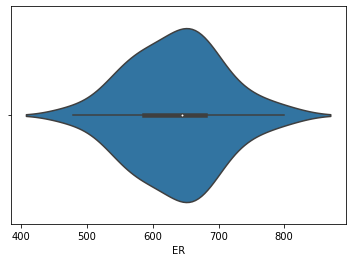

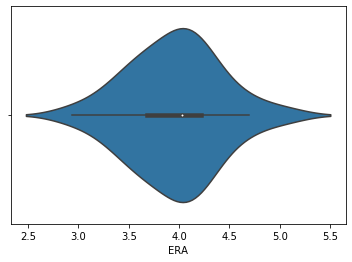

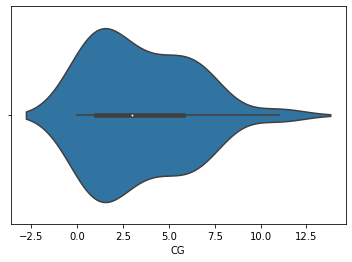

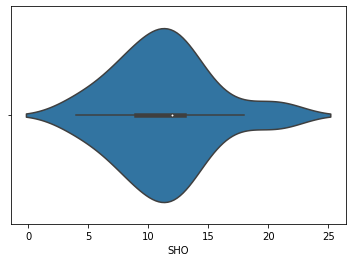

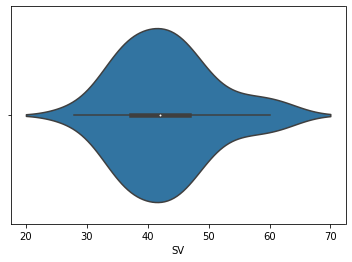

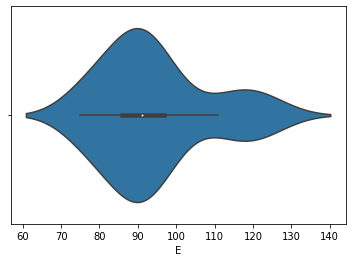

In [13]:
list=[ 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for value in list:
    
    sns.violinplot(df[value])
    plt.show()


Observations :-
    
1. Maximum number of runs gained by team is in the range of 650-750.
2. Maximum number of at bats gained by team is in the range of 5450-5550.
3. Maximum number of at hits gained by team is in the range of 1350-1400.
4. Maximum number of doubles gained by team is in the range of 260-280.
5. Maximum number of triples gained by team is in the range of 20-40.
6. Maximum number of home runs gained by team is in the range of 125-175.
7. Maximum number of walks gained by team is in the range of 450-500.
8. Maximum number of shutouts gained by team is in the range of 1200-1350.
9. Maximum number of stolen bases gained by team is in the range of 60-100.
10. Maximum number of allowed runs gained by team is in the range of 650-750.
11. Maximum number of earned runs gained by team is in the range of 600-700.
12. Maximum number of earned runs average gained by team is in the range of 3.75-4.25.
13. Maximum number of complete games gained by team is in the range of 0.0-2.5.
14. Maximum number of shutouts gained by team is in the range of 10.0-12.5.
15. Maximum number of saves gained by team is in the range of 35-45.
16. Maximum number of errors gained by team is in the range of 85-95.

In [14]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


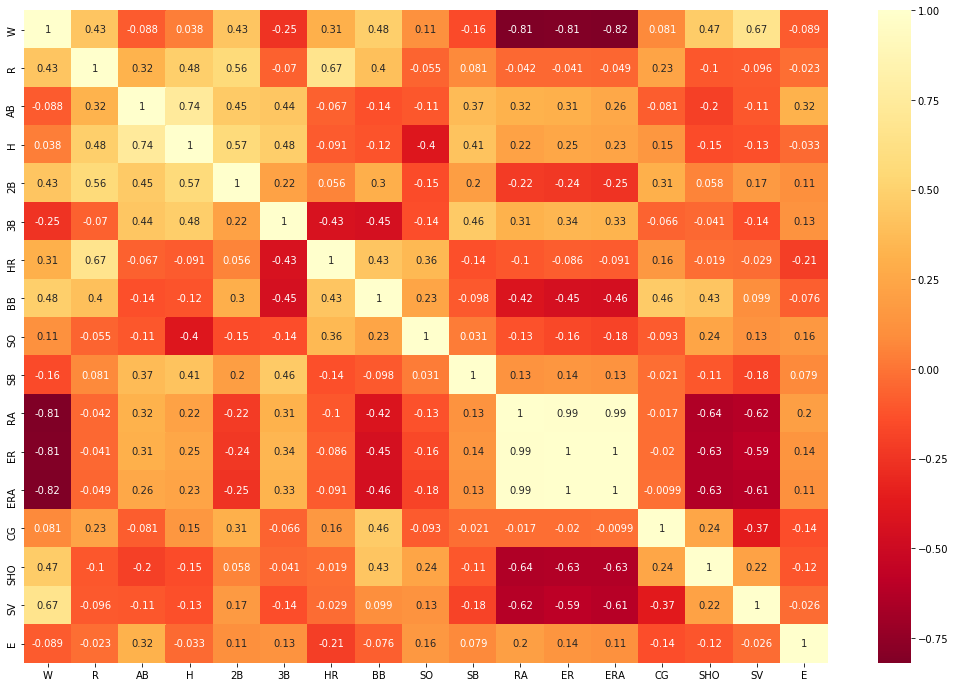

In [15]:
# Multivariate Analysis
plt.figure(figsize=(18,12))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations :-

1. Win is highly positively correlated to Saves.
2. Saves is highly negatively correlated to allowed runs.
3. Runs allowed is highly positively correlated to earned runs average.
4. ERA is highly negatively correlated to Win.

# Bivariate Analysis

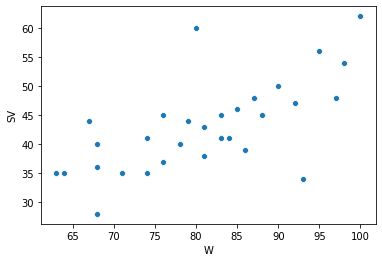

In [16]:
sns.scatterplot(x='W',y='SV',data=df)

Observations :-
    
1. Number of Wins increase as saves increase in team.

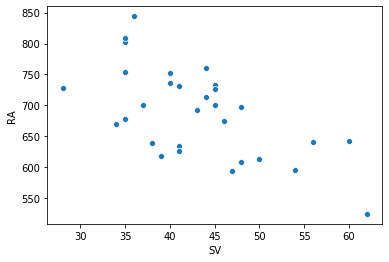

In [17]:
sns.scatterplot(x='SV',y='RA',data=df)

Observations :-
    
1. Number of allowed runs increase as saves increase in team.

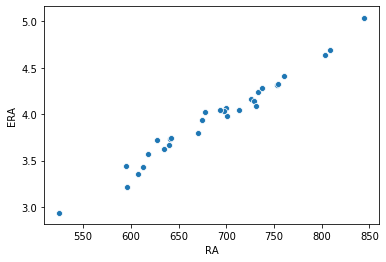

In [18]:
sns.scatterplot(x='RA',y='ERA',data=df)

Observations :-
    
1. Average earned runs increase as allowed runs increase.

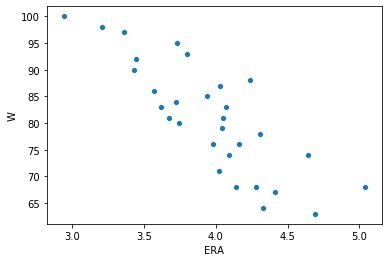

In [19]:
sns.scatterplot(x='ERA',y='W',data=df)

Observations :-
    
1. Number of Wins increase as average earned runs increase in team.

# Plotting Outliers

W         AxesSubplot(0.125,0.125;0.0383663x0.755)
R       AxesSubplot(0.17104,0.125;0.0383663x0.755)
AB     AxesSubplot(0.217079,0.125;0.0383663x0.755)
H      AxesSubplot(0.263119,0.125;0.0383663x0.755)
2B     AxesSubplot(0.309158,0.125;0.0383663x0.755)
3B     AxesSubplot(0.355198,0.125;0.0383663x0.755)
HR     AxesSubplot(0.401238,0.125;0.0383663x0.755)
BB     AxesSubplot(0.447277,0.125;0.0383663x0.755)
SO     AxesSubplot(0.493317,0.125;0.0383663x0.755)
SB     AxesSubplot(0.539356,0.125;0.0383663x0.755)
RA     AxesSubplot(0.585396,0.125;0.0383663x0.755)
ER     AxesSubplot(0.631436,0.125;0.0383663x0.755)
ERA    AxesSubplot(0.677475,0.125;0.0383663x0.755)
CG     AxesSubplot(0.723515,0.125;0.0383663x0.755)
SHO    AxesSubplot(0.769554,0.125;0.0383663x0.755)
SV     AxesSubplot(0.815594,0.125;0.0383663x0.755)
E      AxesSubplot(0.861634,0.125;0.0383663x0.755)
dtype: object

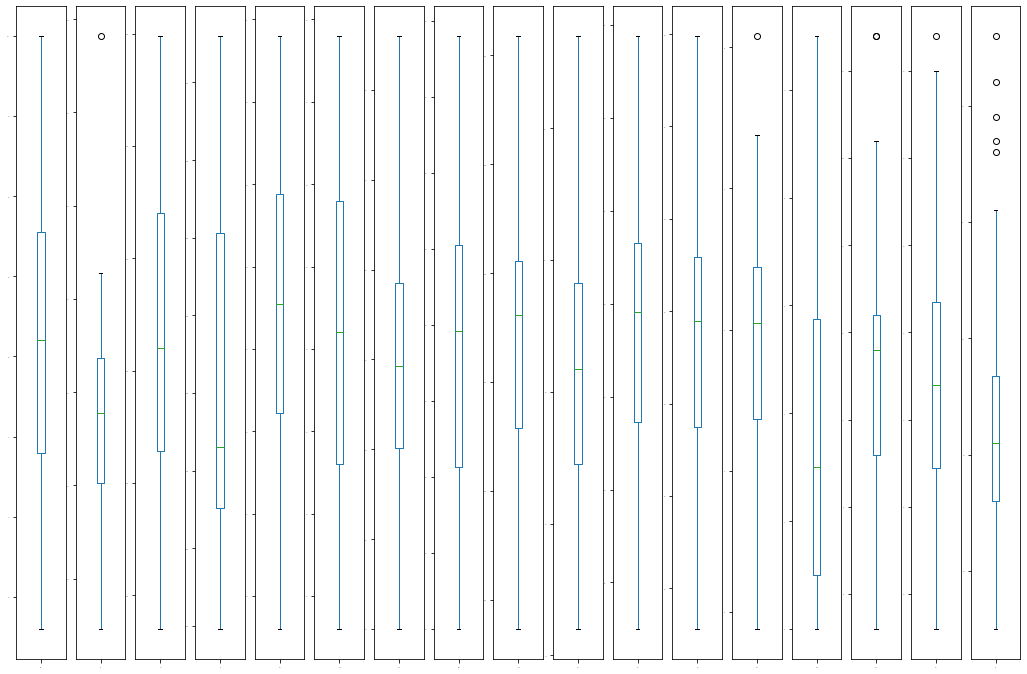

In [20]:
df.plot(kind='box',subplots=True,layout=(1,17),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. R, SHO, SV, E and ERA have outliers.

# Removing Outliers

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [22]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [23]:
df_new.shape

(29, 17)

In [24]:
df.shape

(30, 17)

In [25]:
# 1 rows is removed as outliers

In [26]:
df=df_new

In [27]:
df.shape

(29, 17)

# To check skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B1512C308>,
      dtype=object)

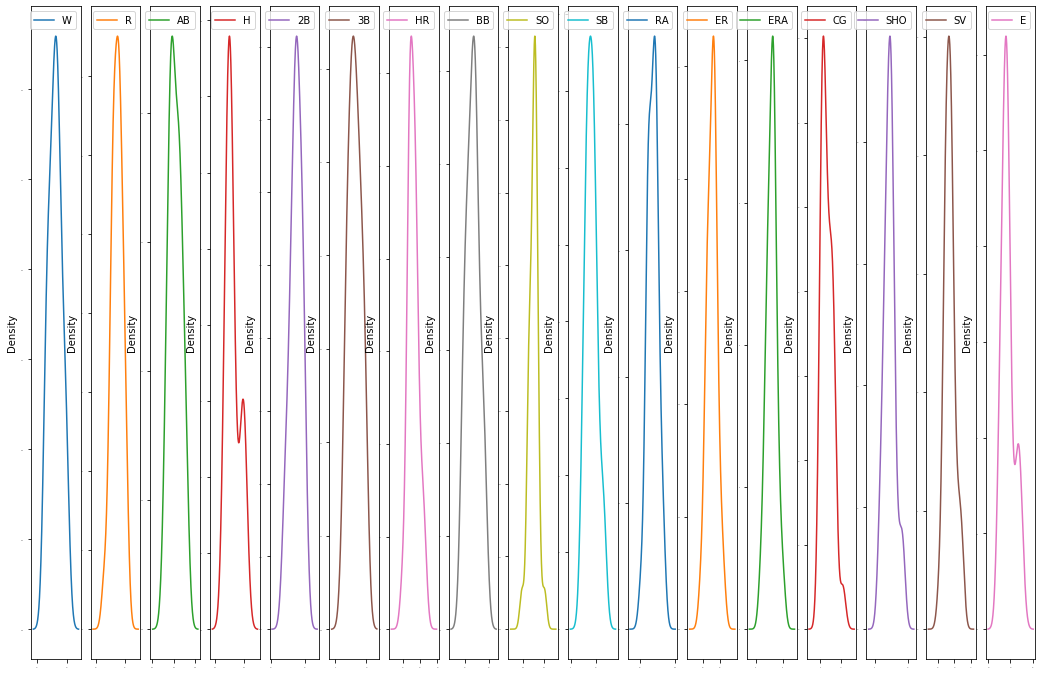

In [28]:
df.plot(kind='density',subplots=True,layout=(1,17),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. The data of H, CG and E is right skewed.

In [29]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [30]:
list_1=['H', 
       'CG',  'E']
for val in list_1:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [31]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO    0.526943
SV     0.627480
E      0.714966
dtype: float64

In [32]:
list_1=['H', 
        'E']
for val in list_1:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [33]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.749892
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO    0.526943
SV     0.627480
E      0.649882
dtype: float64

In [35]:
list_1=['H', 
        'E']
for val in list_1:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [37]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.744169
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.260678
SHO    0.526943
SV     0.627480
E      0.616774
dtype: float64

# Train Test Split

In [39]:
x=df[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']]

In [40]:
y=df['W']

# Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [42]:
x=pd.DataFrame(x)

In [43]:
x.columns=[ 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']

# Algorithms

In [44]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.3100764100925193
error:
Mean absolute error: 8.643450444454865
Mean squared error: 85.63500558810813
Root Mean squared error: 9.25391839104431
-0.20810327620434843
error:
Mean absolute error: 5.511403184665432
Mean squared error: 46.746200238437645
Root Mean squared error: 6.837119293857439
0.6208669396811901
error:
Mean absolute error: 5.397302400885953
Mean squared error: 62.81228946261426
Root Mean squared error: 7.925420459673686
0.7516855918004042
error:
Mean absolute error: 4.57266919439247
Mean squared error: 26.453085934732457
Root Mean squared error: 5.143256355144322
0.5571661469561792
error:
Mean absolute error: 4.962262776847309
Mean squared error: 27.29302522841508
Root Mean squared error: 5.224272698511735
0.6678834456139529
error:
Mean absolute error: 5.680009289866226
Mean squared error: 42.456695850493865
Root Mean squared error: 6.515880282087284
0.25303893451601644
error:
Mean absolute error: 6.188277709299991
Mean squared error: 58.23247490099628
Root Mean squared

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=184)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.8894635687757846
error:
Mean absolute error: 3.024158719889369
Mean squared error: 11.554440831233295
Root Mean squared error: 3.3991823768714284


In [46]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))


0.5763373682155408
error:
Mean absolute error: 5.428571428571429
Mean squared error: 44.285714285714285
Root Mean squared error: 6.654751256486923


In [47]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
print(r2_score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))


0.6982975400234284
error:
Mean absolute error: 4.714285714285716
Mean squared error: 31.537142857142857
Root Mean squared error: 5.615794054017905


In [48]:
svm=SVR()
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
r2score=r2_score(y_test,predsvr)
print(r2_score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error:',mean_squared_error(y_test,predsvr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))


0.11546726370868954
error:
Mean absolute error: 8.290037420466344
Mean squared error: 92.46074847518557
Root Mean squared error: 9.61565122470577


In [49]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [50]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred=rd.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.8928819714387227
error:
Mean absolute error: 2.88041885457823
Mean squared error: 11.197113107976786
Root Mean squared error: 3.3462087663468916


In [51]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.714142628277285
error:
Mean absolute error: 4.3839890722275685
Mean squared error: 29.88084608089278
Root Mean squared error: 5.466337538141309


In [52]:
el=ElasticNet(alpha=.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
pred=el.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.7109419329453947
error:
Mean absolute error: 4.399394054826922
Mean squared error: 30.215416723544667
Root Mean squared error: 5.49685516668801


Ridge Regression is the best algorithm.

# Cross Validation Score

In [82]:
from sklearn.model_selection import cross_val_score
rdscores=cross_val_score(rd,x,y,cv=5)
print(rdscores)
scoresrd=(rdscores)**2
print(scoresrd.mean(),scoresrd.std())


[ 0.62243123 -0.62919988  0.62561984 -0.35822685 -0.39668311]
0.29207945559761794 0.1222266260475227


In [83]:
list1=[0.8928819714387227]
list2=[0.29207945559761794]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)
    
print(difference)

[0.6008025158411048]


As the difference between accuracy scores and cross validation scores of Ridge Regressor is only 6%. So, It is verified that
Ridge Regressor is the best algorithm for this model with accuracy of 89.288 %.

# Hyper Parameter Tuning

In [89]:
rd=Ridge()
grid_param={'alpha':[.0001,.001,.01,.1],'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
           'max_iter': [100,110,120,130,140],'tol':[1e-3,1e-5,1e-7]}
gd_sr=GridSearchCV(estimator=rd,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'max_iter': [100, 110, 120, 130, 140],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.001, 1e-05, 1e-07]},
             scoring='accuracy')

In [90]:
gd_sr.best_params_

{'alpha': 0.0001, 'max_iter': 100, 'solver': 'auto', 'tol': 0.001}

In [91]:
rd=Ridge(alpha = 0.0001, max_iter= 100, solver= 'auto',tol=0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred=rd.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.8928819714387227
error:
Mean absolute error: 2.88041885457823
Mean squared error: 11.197113107976786
Root Mean squared error: 3.3462087663468916


Accuracy of ridge Regressor has remained same as 89.288 % with hyper parameter tuning.

# Saving the model

In [92]:
import joblib

In [93]:
joblib.dump(rd,"rd_baseball.obj")

['rd_baseball.obj']